# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/
- kepler.gl (large-scale geospatial visualization): https://kepler.gl/

## Please submit your finished lab06 jupyter notebook via pull request in GitHub

In [33]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

## load the data sets

In [37]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [3]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [4]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

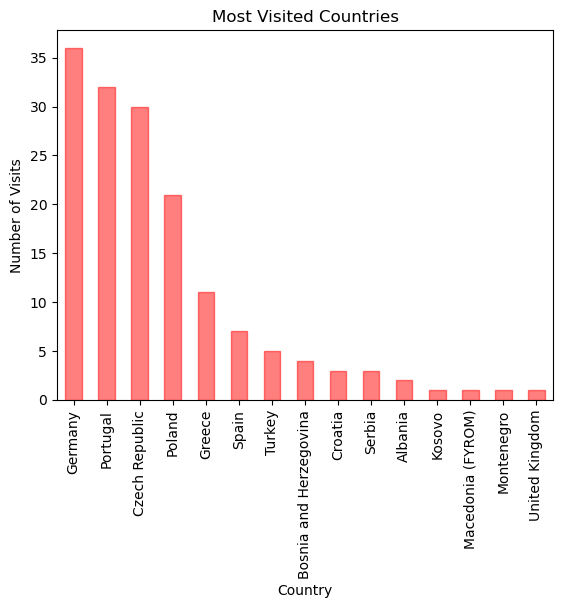

In [5]:
# Q1: Can you draw a bar chart for the most visited countries by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim

# Bar chart with matplotlib
most_visited_countries = rs.groupby(rs["country"])[["date"]].count().sort_values(by="date", ascending=False)
most_visited_countries.plot(kind="bar", color="r", edgecolor="r", alpha=0.5, rot=90, grid=False, legend=False)

# Add a title and labels
plt.title("Most Visited Countries")
plt.xlabel("Country")
plt.ylabel("Number of Visits")

plt.show()

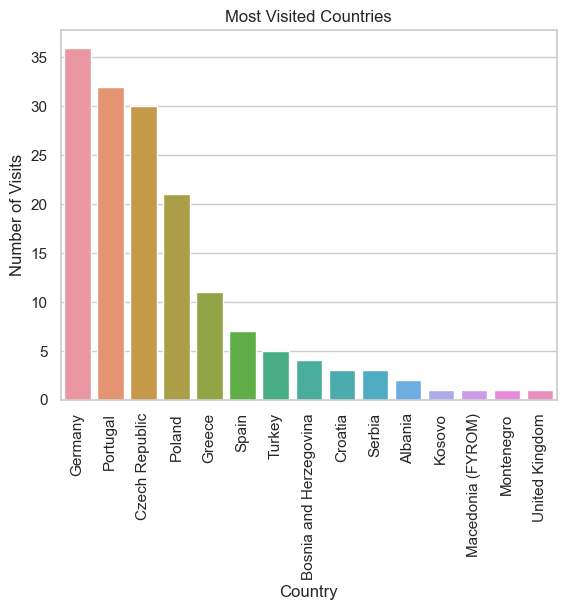

In [6]:
# Bar chart with seaborn
import seaborn as sns

# Ensuring most_visited_countries is a series
most_visited_countries_s = most_visited_countries.squeeze()

sns.set()
sns.set_style("whitegrid")
sns.barplot(x=most_visited_countries_s.index, y=most_visited_countries_s.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title and labels
plt.title("Most Visited Countries")
plt.xlabel("Country")
plt.ylabel("Number of Visits")

# Show the plot
plt.show()

Now you try: re-create the plot above, but make the bars orange with maroon edges.

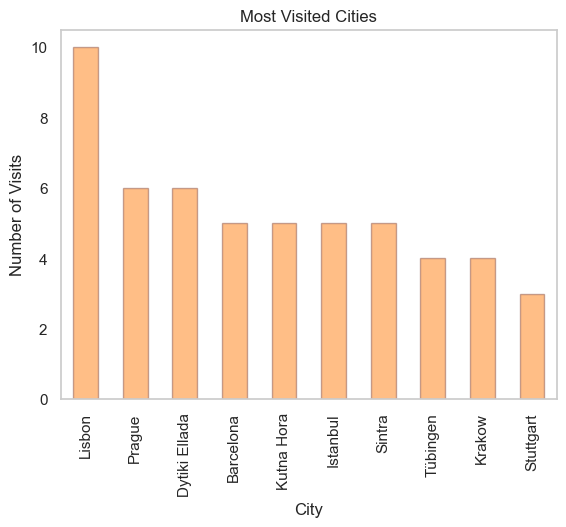

In [20]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries

# Matplotlib
most_visited_cities = rs.groupby(rs["city"])[["date"]].count().sort_values(by="date", ascending=False).head(10)
most_visited_cities.plot(kind="bar", color="tab:orange", edgecolor="tab:brown", alpha=0.5, grid=False, legend=False)

# Showing only the top 10 most visited cities
# plt.xlim(0, 10)

# Add a title and labels
plt.title("Most Visited Cities")
plt.xlabel("City")
plt.ylabel("Number of Visits")

plt.show()

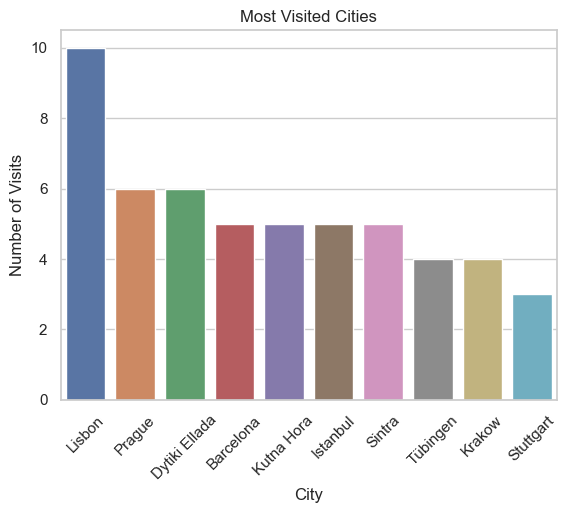

In [22]:
# Seaborn

# Ensuring most_visited_cities is a series
most_visited_cities_s = most_visited_cities.squeeze()

sns.set()
sns.set_style("whitegrid")
sns.barplot(x=most_visited_cities_s.index, y=most_visited_cities_s.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and labels
plt.title("Most Visited Cities")
plt.xlabel("City")
plt.ylabel("Number of Visits")

plt.show()

## Next: scatter plots as simple maps

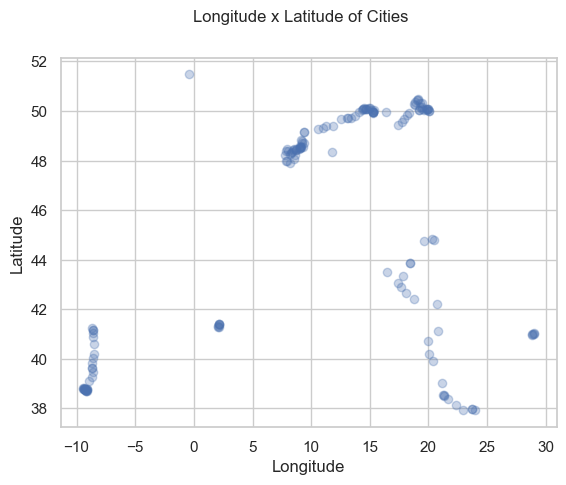

In [9]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings.

# Matplotlib
fig, ax = plt.subplots()

# Title and labels
plt.suptitle('Longitude x Latitude of Cities', fontsize=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax = plt.scatter(rs["lon"], rs["lat"], alpha = .3)

plt.show()

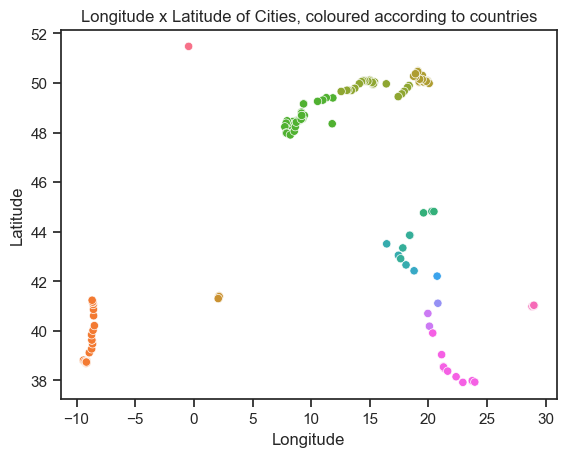

In [10]:
# Seaborn
sns.set_style("ticks")
sns.scatterplot(data=rs, x="lon", y="lat", hue="country", legend=False)

# Add a title and labels
plt.title("Longitude x Latitude of Cities, coloured according to countries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

## Line charts, with annotation

In [11]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

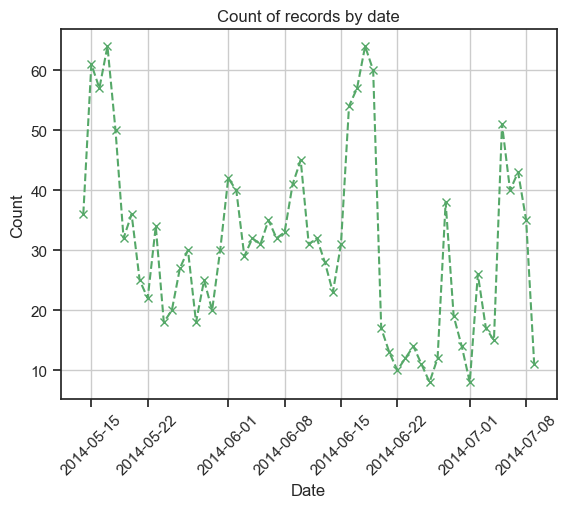

In [12]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings.

# Matplotlib
fig, ax = plt.subplots()
ax.plot(countdata, color="g", marker="x", linestyle="--")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid
plt.grid(True)

# Add a title and labels
plt.title("Count of records by date")
plt.xlabel("Date")
plt.ylabel("Count")

plt.show()

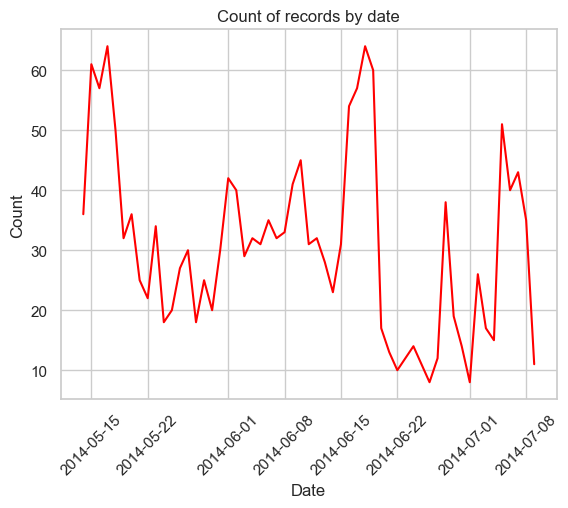

In [13]:
# Seaborn
sns.set_style("whitegrid")
sns.lineplot(data=countdata, color="red")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and labels
plt.title("Count of records by date")
plt.xlabel("Date")
plt.ylabel("Count")

plt.show()

64
8


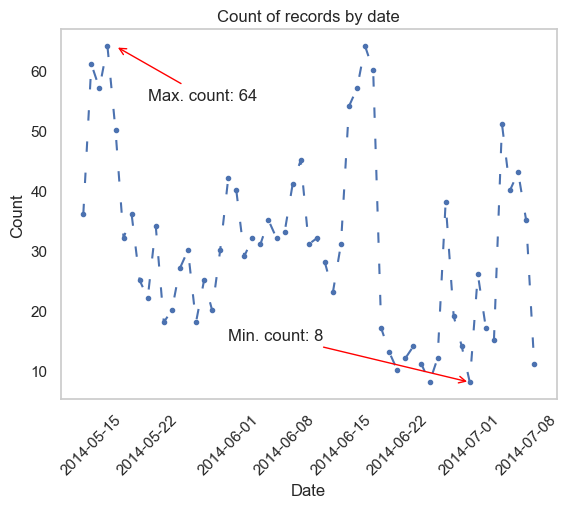

In [14]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

print(countdata.max())
print(countdata.min())

fig, ax = plt.subplots()
ax.plot(countdata, marker=".", linestyle=(0, (5, 10)))

# Annotate max and min count values
ax.annotate("Max. count: 64",
            xy=(pd.Timestamp("2014-05-18"), 64),
            xytext=(pd.Timestamp("2014-05-22"), 55),
            arrowprops={"arrowstyle":"->", "color":"red"})

ax.annotate("Min. count: 8",
            xy=(pd.Timestamp("2014-07-01"), 8),
            xytext=(pd.Timestamp("2014-06-01"), 15),
            arrowprops={"arrowstyle":"->", "color":"red"})

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove grid
plt.grid(False)

# Add a title and labels
plt.title("Count of records by date")
plt.xlabel("Date")
plt.ylabel("Count")

plt.show()

## Pie charts

In [15]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


city
Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: count, dtype: int64

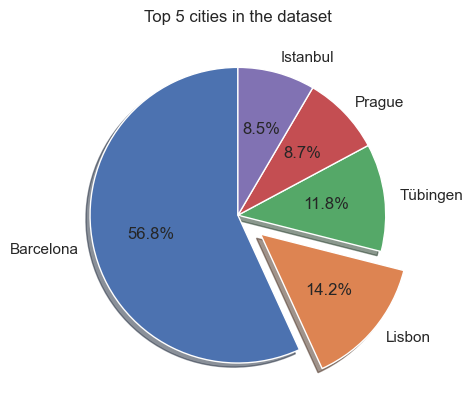

In [16]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer.

# Matplotlib

# Labels
labels = "Barcelona", "Lisbon", "Tübingen", "Prague", "Istanbul"

explode = (0, 0.2, 0, 0, 0) # explode second slice (Lisbon)

fig, ax = plt.subplots()
ax.pie(cities.head(), explode=explode, labels=labels, autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)
plt.title('Top 5 cities in the dataset')
plt.show()

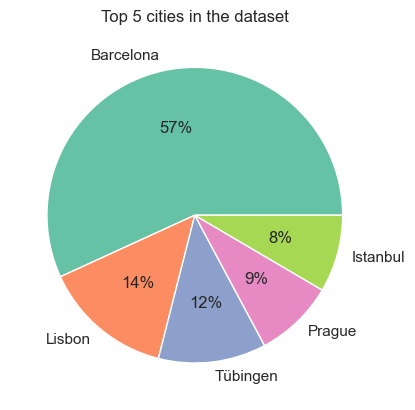

In [17]:
# Seaborn

fig, ax = plt.subplots()

# Define Seaborn color palette to use
colors = sns.color_palette('Set2')[0:5]

# Define figure size
# plt.figure(figsize=(8,8))

# Create pie chart
plt.pie(cities.head(), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 cities in the dataset')
plt.show()

## Extra task: Kepler.gl

In [39]:
# Q7: can you visualize the GPS points by using Kepler.gl? 
# Here are some examples: https://docs.kepler.gl/docs/keplergl-jupyter

from keplergl import KeplerGl

# Create map object
map = KeplerGl()

# Add data
map.add_data(data=rs, name="map_data")

# Display
display(map)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


C:\Users\manue\anaconda3\Lib\site-packages\IPython\core\formatters.py:367: FormatterWarning: text/html formatter returned invalid type <class 'bytes'> (expected <class 'str'>) for object: KeplerGl(data={'map_data': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157], 'columns': ['lat', 'lon', 'date', 'city', 'country'], 'data': [[51.478199100000005, -0.446081

KeplerGl(data={'map_data': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20…